## Importing Libraries

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
!pip install seaborn
import seaborn as sns
from datetime import datetime, timedelta
!pip install statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import random
from scipy import stats
import statsmodels.api as sm
from itertools import product
!pip install yfinance
import yfinance as yf
# !pip install sktime

import warnings
warnings.filterwarnings('ignore')
!pip install pandas_datareader
import pandas_datareader as web
import datetime as dt 
import pandas_datareader.data as pdr


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Extracting Data

In [3]:
crypto_currency = 'BNB'
against_currency ='USD'
end = datetime.today()
start = dt.datetime(2020,1,1)
yf.pdr_override()
df = pdr.get_data_yahoo("ETH-USD", start, end)
target_col = 'close'
df = df.iloc[::-1]

[*********************100%***********************]  1 of 1 completed


In [4]:
df.index = pd.to_datetime(df.index)

## Data Analysis and Preparation 

In [5]:
df_month = df.resample('M').mean()
# df.sort_index(inplace=True)

In [6]:
df_month

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,132.612274,133.732681,128.798157,129.610855,129.610855,8.936866e+09
2020-01-31,155.320138,159.442776,152.113435,156.972718,156.972718,1.057988e+10
2020-02-29,237.377253,245.453988,229.151556,238.756287,238.756287,1.993422e+10
2020-03-31,163.235093,169.511596,154.012526,160.376243,160.376243,1.609424e+10
2020-04-30,169.488213,175.956581,166.018574,171.946989,171.946989,1.773863e+10
2020-05-31,207.346755,212.502076,202.587463,208.125855,208.125855,1.630946e+10
2020-06-30,236.268403,240.172739,231.528894,236.159229,236.159229,8.407357e+09
2020-07-31,255.554494,262.695335,252.190552,259.405542,259.405542,8.110708e+09
2020-08-31,399.326147,411.358921,388.712386,402.153482,402.153482,1.206848e+10


Checking stationarity of the given data, using ADFuller test, 
p must be less than 0.05 to discard the null hypothesis that our series is non-stationary

In [7]:
df.rolling(3).sum()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-30,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-29,4511.674927,4768.652344,4436.606689,4670.024902,4670.024902,6.361886e+10
2022-08-28,4474.835205,4662.562744,4339.107544,4507.423584,4507.423584,5.262519e+10
2022-08-27,4429.803223,4579.251587,4312.558716,4474.979736,4474.979736,4.891024e+10
...,...,...,...,...,...,...
2020-01-04,405.546158,419.791107,404.165817,415.650299,415.650299,2.405133e+10
2020-01-03,396.651878,410.016937,394.576202,405.517853,405.517853,2.543443e+10
2020-01-02,392.399818,401.426773,386.485489,396.651253,396.651253,2.594046e+10


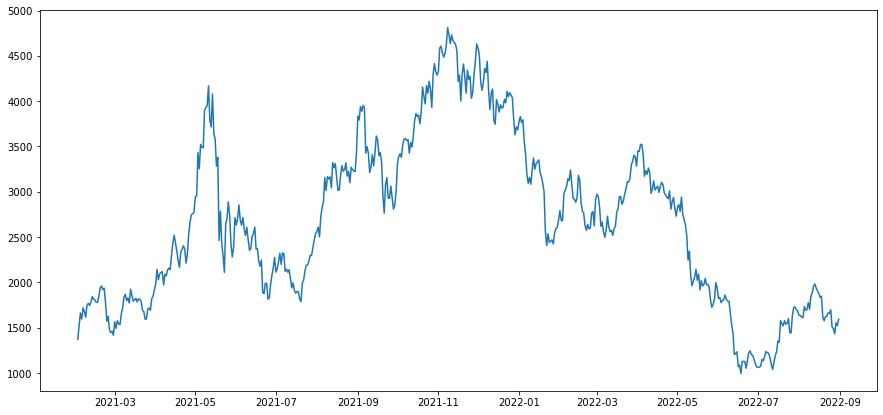

In [8]:
plt.plot(df.loc[ :pd.to_datetime("2021-02-01")].Close)

In [9]:
adfuller(df.loc[ :pd.to_datetime("2022-01-01")].Close)[1]

0.9135899461828023

<AxesSubplot:xlabel='Date', ylabel='Close'>

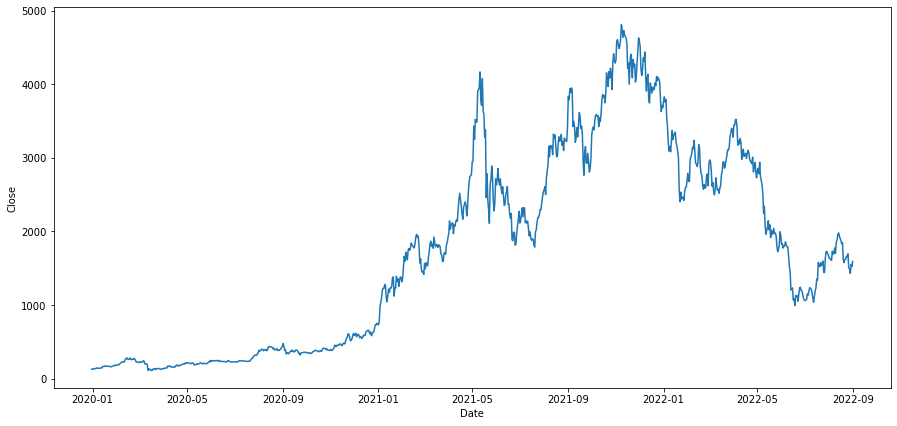

In [10]:
sns.lineplot(data=df,y="Close",x=df.index)

Dickey–Fuller test: p=0.762805


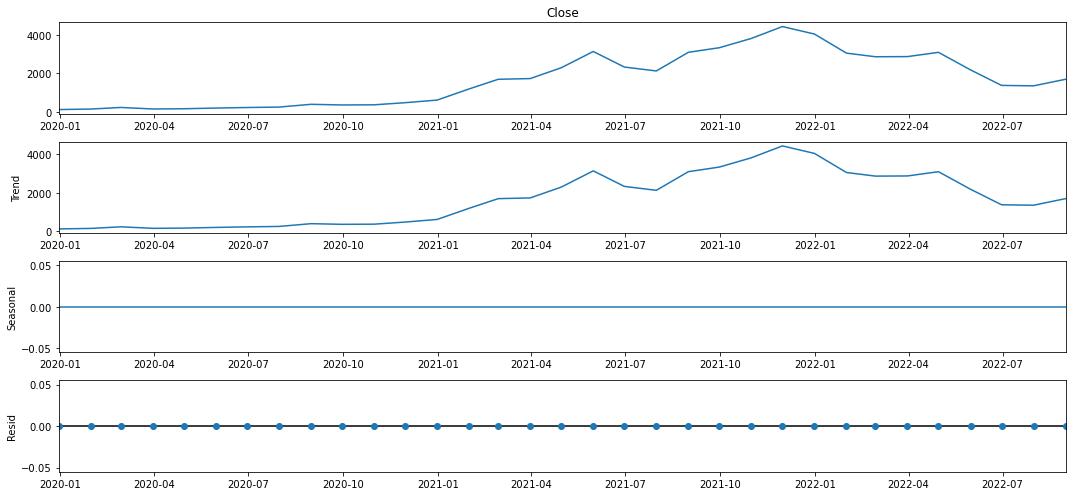

In [11]:
seasonal_decompose(df_month.Close, period=1).plot()
print("Dickey–Fuller test: p=%f" % adfuller((df.Close[5:]))[1])
plt.show()

p greater than 0.05, that is our series is stationary

In [12]:
# Box-Cox Transformations
df_month['close_box'], lmbda = stats.boxcox(df_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(df_month.close_box)[1])

Dickey–Fuller test: p=0.359627


Using Differencing method to make our non-stationary series stationary

p less than 0.05, now our series is stationary, and we can use ARIMA model.
ARIMA works better on stationary.

Dickey–Fuller test: p=0.359627


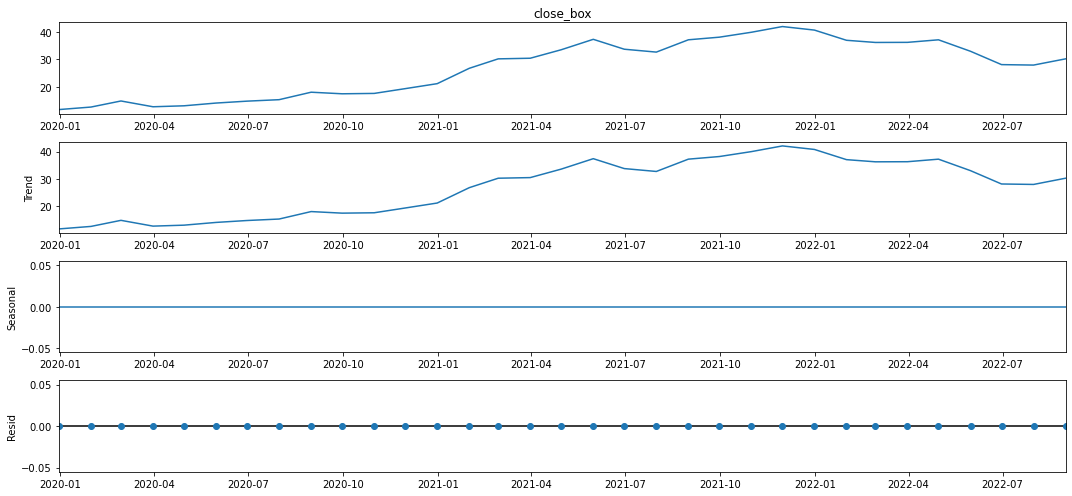

In [13]:
seasonal_decompose(df_month.close_box, period=1).plot()
print("Dickey–Fuller test: p=%f" % adfuller(df_month.close_box)[1])

## Model Development

### ARIMA Model

In [14]:
df['Date']=df.index
df1 = df[['Date','Close']]
df1.columns =['ds','y']
df1['ds'] = pd.to_datetime(df1['ds'])
df1 = df1[::-1]

In [15]:
def rmse(y_true, y_pred):
	return np.sqrt(np.mean(np.square(y_pred - y_true)))

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
!pip install pmdarima
from pmdarima.arima import auto_arima

Defaulting to user installation because normal site-packages is not writeable


In [29]:
arima_model = auto_arima(df1['y'][-322:-122],start_p=1,start_q=2,start_d=3,start_P=1,start_Q=1,start_D=3,max_P=10,max_Q=10,max_D=10,max_d=10,
                      max_p=10, max_q=10, # maximum p and q
                      m=36,              # frequency of series
                      # d=None,           # let model determine 'd'
                      D=2,    #4
                      # q=3,
                      # Q=0,
                      d=1,
                    #   p=2,
                      # P=2,
                      seasonal=True,   # No Seasonality
                      stationarity=False, # No Stationarity
                      trace=True,
                      error_action='ignore',  
                      # n_jobs=3,   # Use all available CPUs
                      suppress_warnings=True, 
                      # out_of_sample_size=10,
                      maxiter=1,
                      stepwise=True).fit(df1['y'][-322:-122])

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,2,1)[36]             : AIC=1782.990, Time=3.12 sec
 ARIMA(0,1,0)(0,2,0)[36]             : AIC=1838.041, Time=0.39 sec
 ARIMA(1,1,0)(1,2,0)[36]             : AIC=1785.640, Time=1.72 sec
 ARIMA(0,1,1)(0,2,1)[36]             : AIC=inf, Time=1.69 sec
 ARIMA(1,1,2)(0,2,1)[36]             : AIC=inf, Time=1.81 sec
 ARIMA(1,1,2)(1,2,0)[36]             : AIC=1783.067, Time=1.55 sec
 ARIMA(1,1,2)(2,2,1)[36]             : AIC=1783.468, Time=3.60 sec
 ARIMA(1,1,2)(1,2,2)[36]             : AIC=1796.280, Time=3.14 sec
 ARIMA(1,1,2)(0,2,0)[36]             : AIC=1824.105, Time=0.54 sec
 ARIMA(1,1,2)(0,2,2)[36]             : AIC=1782.335, Time=3.30 sec
 ARIMA(1,1,2)(0,2,3)[36]             : AIC=1784.218, Time=8.07 sec
 ARIMA(1,1,2)(1,2,3)[36]             : AIC=1798.596, Time=8.85 sec
 ARIMA(0,1,2)(0,2,2)[36]             : AIC=1780.800, Time=3.25 sec
 ARIMA(0,1,2)(0,2,1)[36]             : AIC=inf, Time=1.81 sec
 ARIMA(0,1,2)(1,2,2)[36]          

In [18]:
from pmdarima.arima import ARIMA

In [19]:
# arima_model = ARIMA((0,1,2),(0,2,2,36)).fit(df1['y'][-322:-122])  # with intercept ETH-USD

In [30]:
pred = pd.Series(arima_model.predict(n_periods=122))
pred.columns = ['close']

In [31]:
pred

2022-05-02    3049.307084
2022-05-03    3099.824704
2022-05-04    3164.436315
2022-05-05    3151.624043
2022-05-06    3038.548047
                 ...     
2022-08-27    2866.515540
2022-08-28    2366.172610
2022-08-29    2515.726206
2022-08-30    2431.562721
2022-08-31    2816.697429
Freq: D, Length: 122, dtype: float64

In [32]:
pred1 = pred.copy(deep=True)

In [33]:
for x in range(len(pred1)):
  if pred1[x] < 0:
    pred1[x]=0


In [34]:
pred1

2022-05-02    3049.307084
2022-05-03    3099.824704
2022-05-04    3164.436315
2022-05-05    3151.624043
2022-05-06    3038.548047
                 ...     
2022-08-27    2866.515540
2022-08-28    2366.172610
2022-08-29    2515.726206
2022-08-30    2431.562721
2022-08-31    2816.697429
Freq: D, Length: 122, dtype: float64

In [35]:
rmse(np.array(pred1[:]),np.array(df1['y'][-122:]))

1146.4466834231023

In [36]:
mean_absolute_percentage_error(np.array(df1['y'][-122:]),np.array(pred1[:]))

72.84421245280666

[]

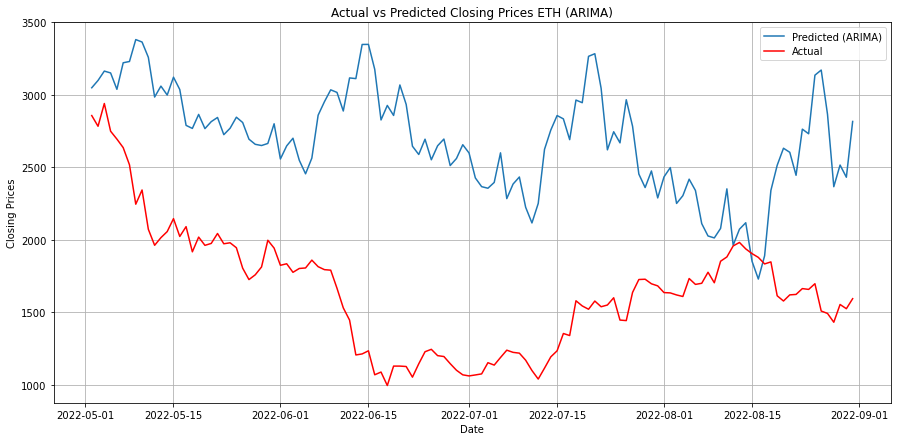

In [38]:
plt.plot(df1['ds'][-122:],pred1[:])
plt.plot(df1['y'][-122:],color='r')
plt.legend(['Predicted (ARIMA)', 'Actual'])
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.title("Actual vs Predicted Closing Prices ETH (ARIMA)")
plt.grid()
plt.plot()


[]

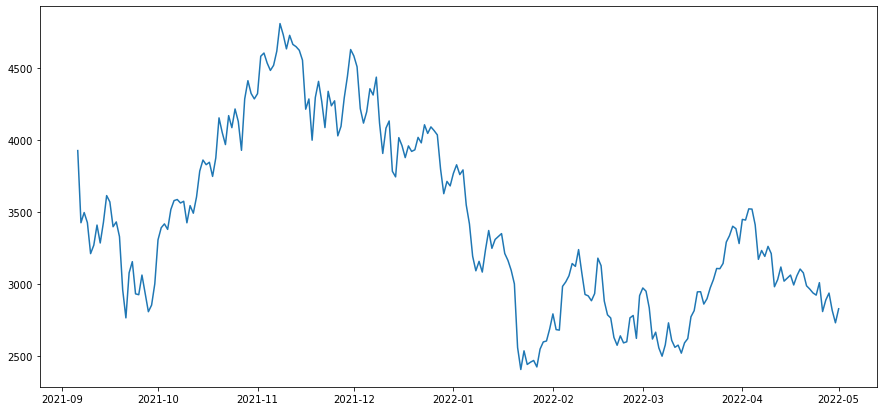

In [253]:
plt.plot(df1['y'][-360:-122])
plt.plot()

In [97]:
np.mean(np.square(np.array(pred1[:])-np.array(df1['y'][-120:])))

ValueError: operands could not be broadcast together with shapes (122,) (120,) 

In [69]:
print(df_month.Close.tail())
pred.head()

Date
2022-04-30    3096.986271
2022-05-31    2187.318915
2022-06-30    1382.772276
2022-07-31    1359.407778
2022-08-31    1699.813827
Freq: M, Name: Close, dtype: float64


2022-05-02    2870.002357
2022-05-03    2962.343187
2022-05-04    3086.417001
2022-05-05    3313.930102
2022-05-06    3467.222544
Freq: D, dtype: float64

plt.plot(pred)
plt.plot()